In [3]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn


  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 8.7/8.7 MB 55.6 MB/s  0:00:00
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   --- --------------------------------

Linear Regression - Cross-validated R²: -3.1353
Random Forest - Cross-validated R²: -0.3081
XGBoost - Cross-validated R²: -6.2617

Model Performance:
                           RMSE        R^2
Linear Regression  1.007440e+06 -18.170271
Random Forest      2.576618e+05  -0.253979
XGBoost            2.418003e+05  -0.104342


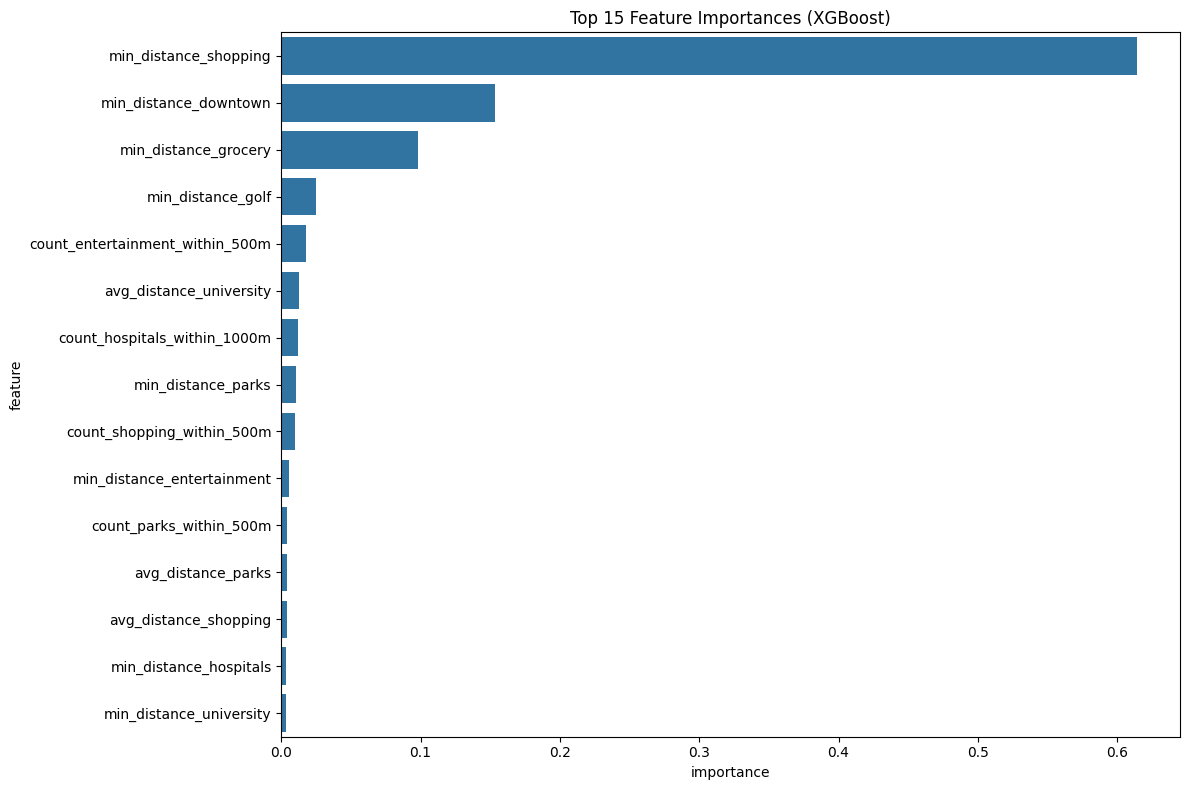

In [10]:

# # Housing Price Prediction from Amenity Proximity
# This notebook loads engineered features from various urban amenities and evaluates different regression models for predicting housing prices.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# ## Step 1: Load Feature-Rich CSV

# Load the new CSV
df = pd.read_csv("merged_features_custom.csv")

# Drop any rows with missing values (optional)
df = df.dropna()

# ## Step 2: Prepare Features and Target

# Target variable
y = df["Residential_TotalGross_Average"]

# Features: drop DAUID and the target
X = df.drop(columns=["DAUID", "Residential_TotalGross_Average"])

# Optionally normalize target
# y = np.log1p(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ## Step 3: Train and Compare Models

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R^2": r2}

    # Cross-validation score (on full dataset)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} - Cross-validated R²: {cv_scores.mean():.4f}")

# ## Step 4: Show Results

results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)

# ## Step 5: Plot Feature Importance for XGBoost

xgb_model = models["XGBoost"]
importances = xgb_model.feature_importances_
feature_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_df.head(15))
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [20]:
# ## Load and Prepare Data (filtered to selected features)

df = pd.read_csv("merged_features_custom.csv")
df = df.dropna()

# Target and filtered Features
y = df["Residential_TotalGross_Average"]

selected_features = [
    "min_distance_grocery",
    "min_distance_shopping",
    "min_distance_hospitals",
    "min_distance_parks",
    "min_distance_entertainment",
    "min_distance_university",
    "min_distance_hospital",
    "min_distance_downtown",
    "min_distance_golf",
]

X = df[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [77]:
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Linear Regression")
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.4f}, Cross-validated R²: {cv_scores.mean():.4f}")



Linear Regression
Test RMSE: 511570.29, R²: -3.9431, Cross-validated R²: -0.6640


In [ ]:
# Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Random Forest")
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.4f}, Cross-validated R²: {cv_scores.mean():.4f}")


Random Forest
Test RMSE: 259491.06, R²: -0.2718, Cross-validated R²: 0.0047


XGBoost
Test RMSE: 250563.27, R²: -0.1858, Cross-validated R²: -9.4403


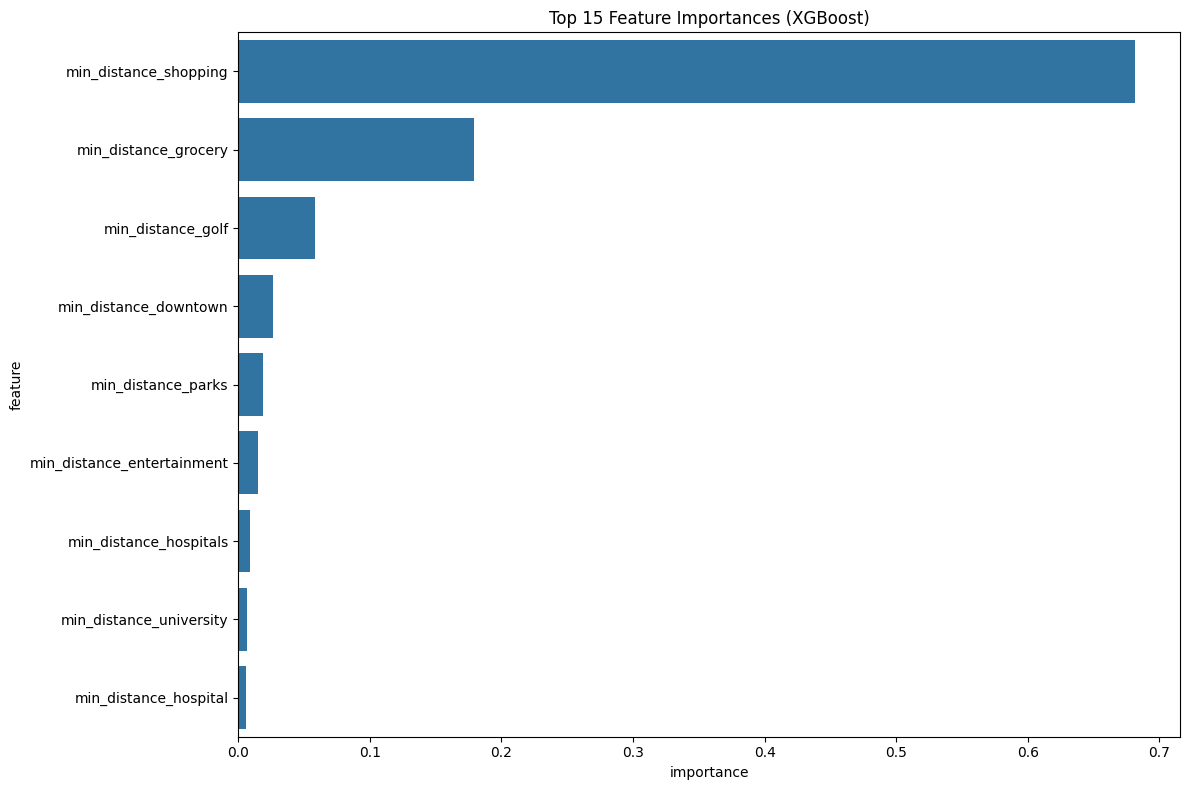

In [83]:
# XGBoost
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("XGBoost")
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.4f}, Cross-validated R²: {cv_scores.mean():.4f}")

# Plot feature importances
importances = model.feature_importances_
feature_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_df.head(15))
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [45]:
# Ridge Regression
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Ridge Regression")
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.4f}, Cross-validated R²: {cv_scores.mean():.4f}")


Ridge Regression
Test RMSE: 466151.37, R²: -3.1043, Cross-validated R²: -0.4995


In [44]:
# Lasso Regression
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Lasso Regression")
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.4f}, Cross-validated R²: {cv_scores.mean():.4f}")


Lasso Regression
Test RMSE: 511569.63, R²: -3.9431, Cross-validated R²: -0.6640


In [43]:
# Support Vector Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Support Vector Regression")
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.4f}, Cross-validated R²: {cv_scores.mean():.4f}")


Support Vector Regression
Test RMSE: 235384.32, R²: -0.0465, Cross-validated R²: -0.1107


In [42]:
# K-Nearest Neighbors Regressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("KNN Regressor")
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.4f}, Cross-validated R²: {cv_scores.mean():.4f}")


KNN Regressor
Test RMSE: 511559.92, R²: -3.9429, Cross-validated R²: -0.0945


min_distance_doctors              -0.030294
avg_distance_doctors              -0.034785
count_doctors_within_500m          0.029174
min_distance_downtown             -0.049987
avg_distance_downtown             -0.049987
count_downtown_within_500m        -0.106054
min_distance_entertainment        -0.045971
avg_distance_entertainment        -0.068343
count_entertainment_within_500m   -0.020670
min_distance_golf                  0.162115
avg_distance_golf                  0.161365
count_golf_within_500m            -0.014934
min_distance_grocery              -0.158231
avg_distance_grocery              -0.120996
count_grocery_within_500m          0.161240
min_distance_hospital              0.022040
avg_distance_hospital              0.022398
count_hospital_within_500m        -0.091724
min_distance_parks                -0.100342
avg_distance_parks                -0.093957
count_parks_within_500m            0.071913
min_distance_school               -0.051302
avg_distance_school             

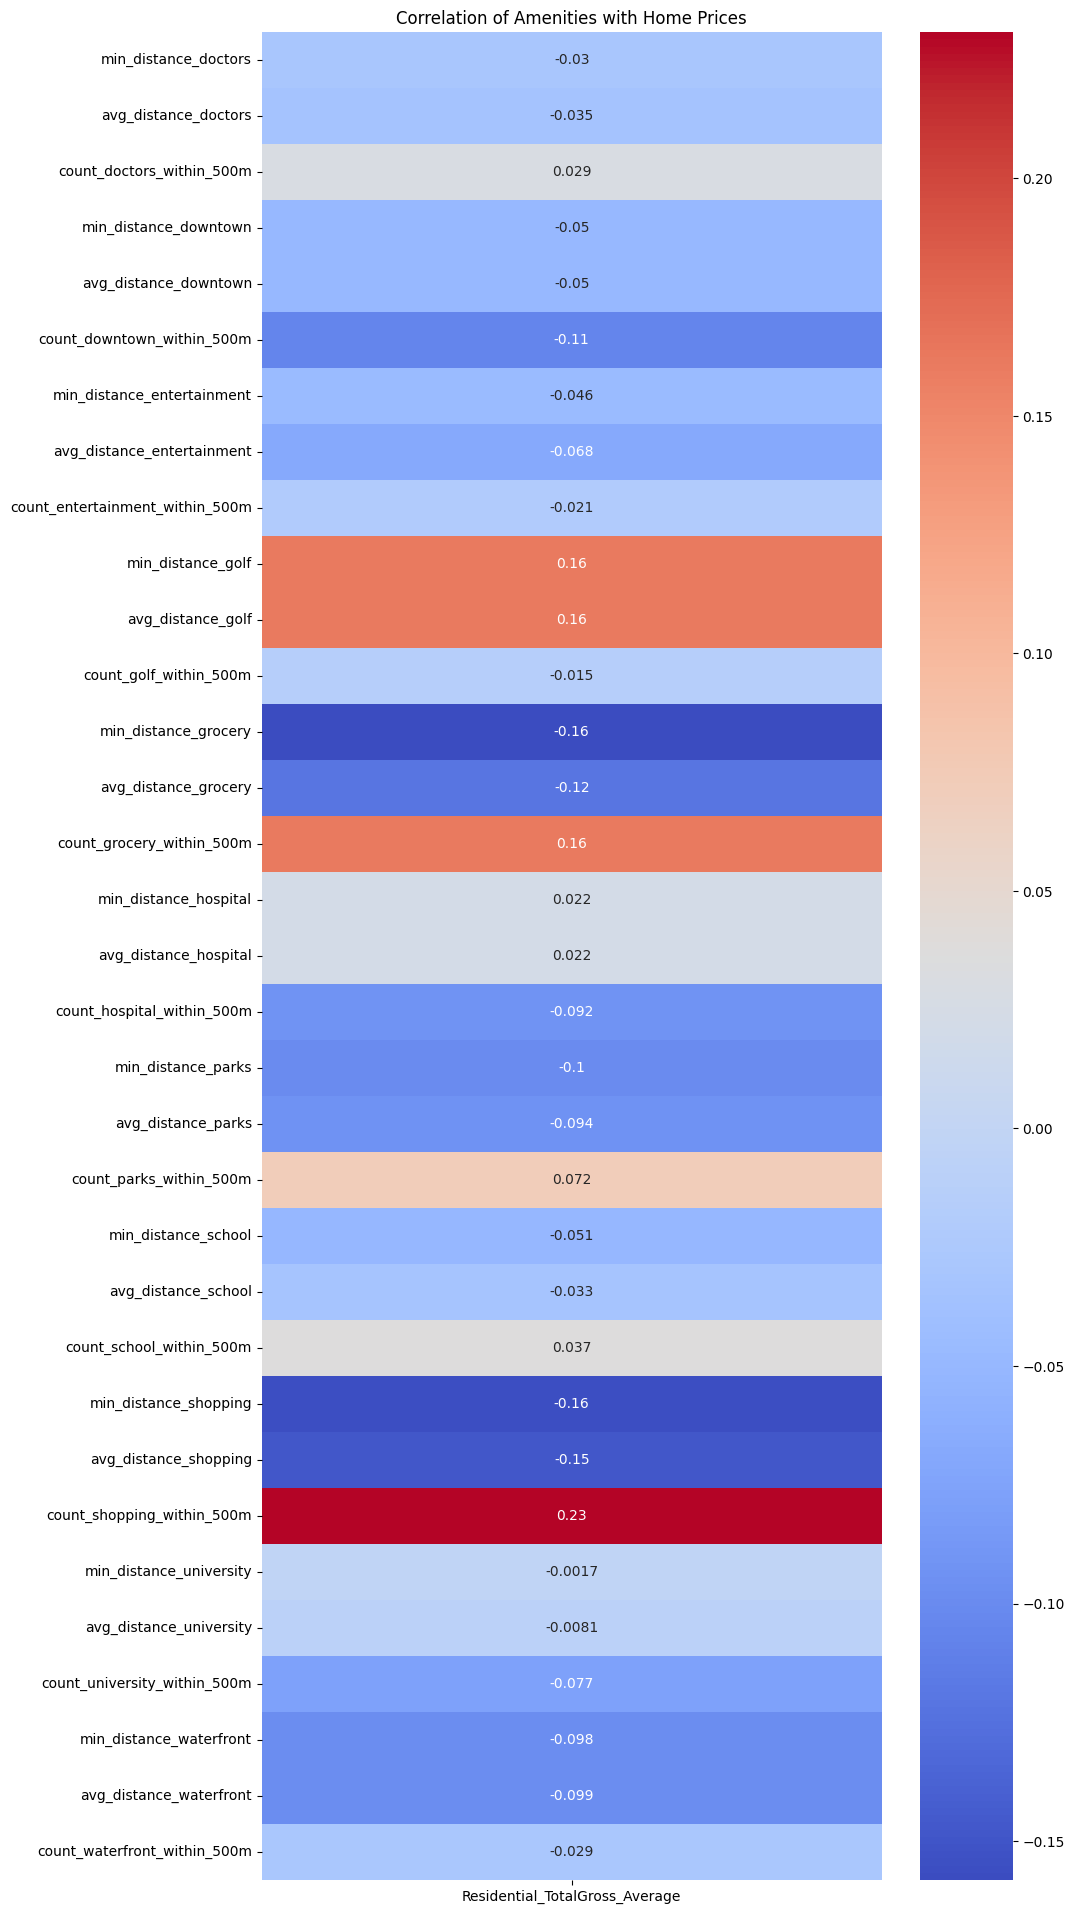

In [89]:
plt.figure(figsize=(10, 24))
df_visual = pd.read_csv('merged_features_custom-Slay.csv')
numeric_columns = df_visual.select_dtypes(include="number")
corr_with_price = numeric_columns.corr()['Residential_TotalGross_Average'].drop('Residential_TotalGross_Average').drop('DAUID')
plt.title("Correlation of Amenities with Home Prices")
sns.heatmap(corr_with_price.to_frame(), annot=True, cmap="coolwarm")


print(corr_with_price)
